In [2]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc

Populating the interactive namespace from numpy and matplotlib


In [58]:
dics = pkl.load(open('/users/global/cornkle/data/OBS/test/c_paper_rainfield.p', 'rb'))
#chris_mcs_-10_gt1000

In [59]:
dic=dics[0]
dic1=dics[1]

In [60]:
print(dic.keys())
print(dic1.keys())

dict_keys(['mon', 'tpixel_zero', 'tpixel', 'twhole', 'hod', 'lat', 'rain', 't', 'tall', 'tpixel_conv', 'tpixel_nzero', 'p', 'tpixel_strat', 'area', 'pi', 'yr', 'pmax', 'pp', 'lon'])
dict_keys(['mon', 'hod', 'lat', 'pmaxconv', 'tnfconv', 'tconv', 'tpixel_stratNZ', 'tpixel_convNZ', 'pconv', 'ppconv', 'piconv', 'lon', 'yr'])


In [83]:
print(len(dic['tpixel_nzero']))
print(len(dic1['pconv']))

2335
2335


In [89]:
precip = np.array(dic['rain']) # array of lists
year = np.array(dic['yr'])
clat = np.array(dic['lat'])
clon = np.array(dic['lon'])
hour = np.array(dic['hod'])
month = np.array(dic['mon'])

valid = np.array(dic['tpixel_zero'])
cent = np.array(dic['cent'])
conv = np.array(dic['tpixel_conv'])
cnz = np.array(dic['tpixel_nzero'])
pconv = np.array(dic1['pconv'])
ppconv = np.array(dic1['ppconv'])
piconv = np.array(dic1['piconv'])

In [92]:
piconv

array([ 0.08658009,  0.16877637,  0.15238095, ...,  0.19097744,
        0.05851064,  0.02553191])

In [107]:
sum20 = []
sum30 = []
tsum = []
nz = []
maxi = []
for p in precip:
    big20 = np.sum(p>20)
    big30 = np.sum(p>30)
    nnz = np.sum(p>0.1)
    ssum = np.sum(p)
    sum20.append(big20)
    sum30.append(big30)
    tsum.append(ssum)
    nz.append(nnz)
    maxi.append(np.max(p))
sum20=np.array(sum20)   
sum30=np.array(sum30)
tsum=np.array(tsum)
nz=np.array(nz)
maxi=np.array(maxi)

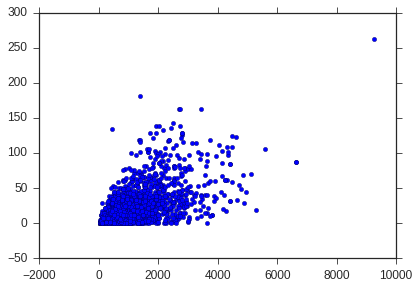

In [47]:
hours = np.arange(0,25,6)
print(hours)
f = plt.figure(figsize=(15, 12), dpi=400)
for ind, h in enumerate(hours):
  if ind == 0:
    continue    
        
  ax = f.add_subplot(2,2,ind)      
  for y in np.unique(year):      
    boole1=[(year==y) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)]  
    
    precip1=precip[boole1]  
    precip1=[item for sublist in precip1 for item in sublist]  
    weights1 = np.ones_like(precip1) / float(len(precip1))   
    hist1, h1 = np.histogram(precip1, bins=np.arange(0.1,100+1,1), weights=weights1, range=(0.1,100))
   
    print(ind)
   
    line, = ax.semilogy(hist1, color='r', lw=2, label='2009-2013')
    line, = ax.semilogy(hist2, color='black', lw=2, label='2004-2008')
    plt.ylabel('ln(normalised frequency of non-zero rain)')
    plt.xlabel('rainfall (mm h-1)')
    plt.title('MCS TRMM PR >15000km2, <-40degC, JJAS, '+str(hours[ind-1])+'-'+str(h)+'Z')
    x=0.15
    y=0.9
    plt.text(x,y,'Period', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,'Avg', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,'P(rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,'P(rain>20|rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,'P(rain>30|rain>0)', transform=ax.transAxes, fontsize=11)
    
    y=0.83
    plt.text(x,y,'2004-2008', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,str(avg2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,str(pnz2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,str(p202), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,str(p302), transform=ax.transAxes, fontsize=11)
    
    y=0.76
    plt.text(x,y,'2009-2013', transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.15,y,str(avg1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.23,y,str(pnz1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.37,y,str(p201), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.6,y,str(p301), transform=ax.transAxes, fontsize=11, color='r')
  
    plt.tight_layout
    #plt.savefig('/users/global/cornkle/C_paper/chris2016/test.png')

[ 0  6 12 18 24]
1
2
3
4


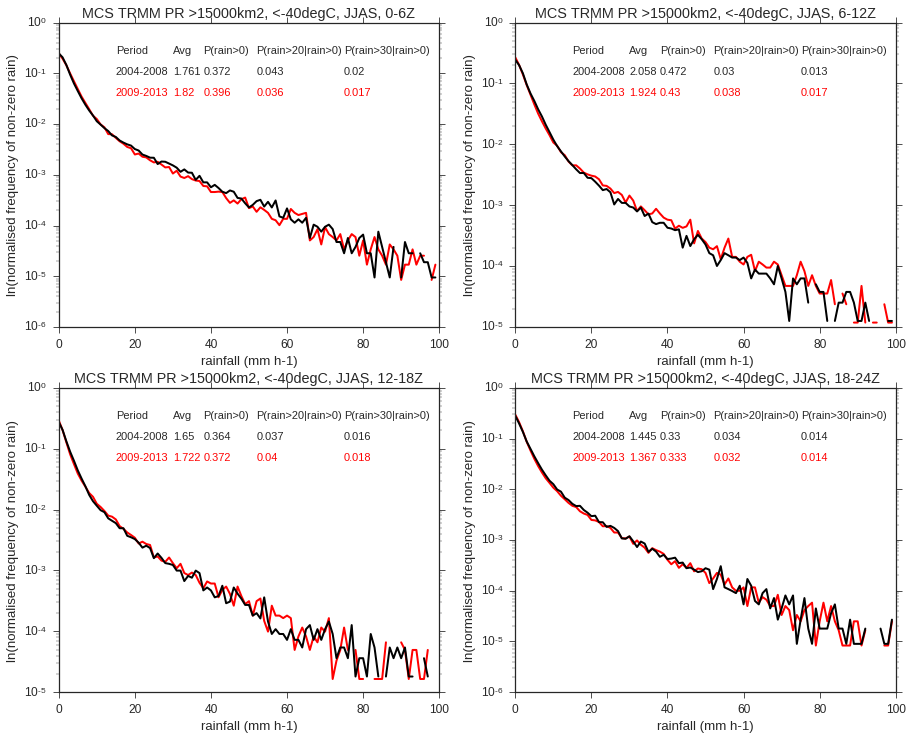

In [48]:
hours = np.arange(0,25,6)
print(hours)
f = plt.figure(figsize=(15, 12), dpi=400)
for ind, h in enumerate(hours):
    if ind == 0:
        continue    
    boole1=[(year>2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)]  
    boole2=[(year<=2008) & (clat>12) & (clon<11) & (hour<h) & (hour>=hours[ind-1]) & (month>=6) & (month<=9)] 
    precip1=precip[boole1]
    precip2=precip[boole2]
    
    avg1 = np.round(np.sum(tsum[boole1])/np.sum(valid[boole1]), decimals=3 )
    avg2 = np.round(np.sum(tsum[boole2])/np.sum(valid[boole2]), decimals=3 )
    p201 = np.round(np.sum(sum20[boole1])/np.sum(nz[boole1]), decimals=3 )
    p202 = np.round(np.sum(sum20[boole2])/np.sum(nz[boole2]), decimals=3 )
    p301 = np.round(np.sum(sum30[boole1])/np.sum(nz[boole1]), decimals=3 )
    p302 = np.round(np.sum(sum30[boole2])/np.sum(nz[boole2]), decimals=3 )
    pnz1 = np.round(np.sum(nz[boole1])/np.sum(valid[boole1]), decimals=3 )
    pnz2 = np.round(np.sum(nz[boole2])/np.sum(valid[boole2]), decimals=3 )
    
    precip1=[item for sublist in precip1 for item in sublist]
    precip2=[item for sublist in precip2 for item in sublist]
    weights1 = np.ones_like(precip1) / float(len(precip1))
    weights2 = np.ones_like(precip2) / float(len(precip2))
    hist1, h1 = np.histogram(precip1, bins=np.arange(0.1,100+1,1), weights=weights1, range=(0.1,100))
    hist2, h2 = np.histogram(precip2, bins=np.arange(0.1,100+1,1), weights=weights2, range=(0.1,100))
    print(ind)
    ax = f.add_subplot(2,2,ind)
    line, = ax.semilogy(hist1, color='r', lw=2, label='2009-2013')
    line, = ax.semilogy(hist2, color='black', lw=2, label='2004-2008')
    plt.ylabel('ln(normalised frequency of non-zero rain)')
    plt.xlabel('rainfall (mm h-1)')
    plt.title('MCS TRMM PR >15000km2, <-40degC, JJAS, '+str(hours[ind-1])+'-'+str(h)+'Z')
    x=0.15
    y=0.9
    plt.text(x,y,'Period', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,'Avg', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,'P(rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,'P(rain>20|rain>0)', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,'P(rain>30|rain>0)', transform=ax.transAxes, fontsize=11)
    
    y=0.83
    plt.text(x,y,'2004-2008', transform=ax.transAxes, fontsize=11)
    plt.text(x+0.15,y,str(avg2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.23,y,str(pnz2), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.37,y,str(p202), transform=ax.transAxes, fontsize=11)
    plt.text(x+0.6,y,str(p302), transform=ax.transAxes, fontsize=11)
    
    y=0.76
    plt.text(x,y,'2009-2013', transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.15,y,str(avg1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.23,y,str(pnz1), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.37,y,str(p201), transform=ax.transAxes, fontsize=11, color='r')
    plt.text(x+0.6,y,str(p301), transform=ax.transAxes, fontsize=11, color='r')
  
    plt.tight_layout
    #plt.savefig('/users/global/cornkle/C_paper/chris2016/test.png')
   

(array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]), array([251, 211, 241, 236, 237, 194, 274, 223, 235, 233]))


<function matplotlib.pyplot.tight_layout>

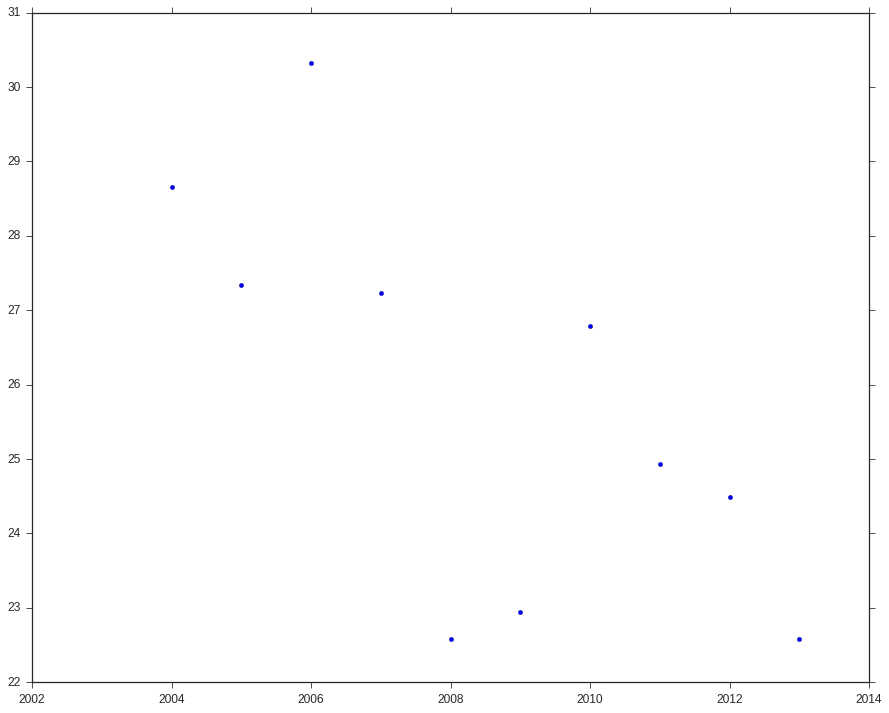

In [113]:
f = plt.figure(figsize=(15, 12), dpi=400)
cshare=[]
conv_rain=[]
nbext=[]
perc=[]
maxis=[]
nb=[]
years = np.unique(year, return_counts=True)
print(years)
for y in years[0]:

    boole=[(year==y)] 
    csum=np.sum(conv[boole])
    cnzsum=np.sum(cnz[boole])
    cshare.append(csum/cnzsum)
    conv_rain.append(np.max(pconv[boole]))
    nbext.append(np.sum(ppconv[boole]))
    perc.append(np.max(piconv[boole]))
    maxis.append(np.mean(maxi[boole]))
    
      
plt.scatter(years[0].astype('str'), conv_rain)
plt.tight_layout
#plt.savefig('/users/global/cornkle/C_paper/chris2016/test.png')